In [238]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### Dataset

In [239]:
X = [[27],
    [35],
    [39],
    [21],
    [22],
    [45],
    [102],
    [110],
    [120]]

y_names = ['lemon', 'orange', 'orange', 'lemon', 'lemon', 'orange','pomelo', 'pomelo', 'pomelo']
y = [0, 1, 1, 0, 0, 1, 2, 2, 2]

In [240]:
data = list(zip(X, y_names, y))
data

[([27], 'lemon', 0),
 ([35], 'orange', 1),
 ([39], 'orange', 1),
 ([21], 'lemon', 0),
 ([22], 'lemon', 0),
 ([45], 'orange', 1),
 ([102], 'pomelo', 2),
 ([110], 'pomelo', 2),
 ([120], 'pomelo', 2)]

In [241]:
df = pd.DataFrame(data)
df

,0,1,2
0,[27],lemon,0
1,[35],orange,1
2,[39],orange,1
3,[21],lemon,0
4,[22],lemon,0
5,[45],orange,1
6,[102],pomelo,2
7,[110],pomelo,2
8,[120],pomelo,2


In [242]:
cols = ['size', 'name', 'y']
df = pd.DataFrame(data, columns=cols)
df

,size,name,y
0,[27],lemon,0
1,[35],orange,1
2,[39],orange,1
3,[21],lemon,0
4,[22],lemon,0
5,[45],orange,1
6,[102],pomelo,2
7,[110],pomelo,2
8,[120],pomelo,2


In [243]:
type(X)

list

In [244]:
X = np.array(X)
X = X.reshape(-1,1)
X

array([[ 27],
       [ 35],
       [ 39],
       [ 21],
       [ 22],
       [ 45],
       [102],
       [110],
       [120]])

### Data Visualization

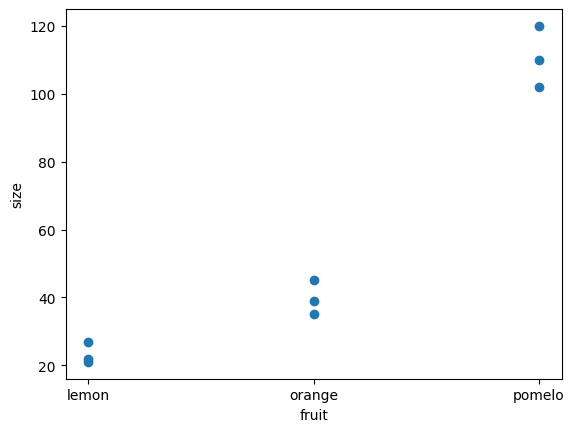

In [245]:
plt.xlabel('fruit')
plt.ylabel('size')

plt.scatter(y_names, X)
plt.show()

### Train and Model

In [246]:
from sklearn.tree import DecisionTreeClassifier

In [247]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [248]:
data_input = [102]
data_input = np.array(data_input)
data_input = data_input.reshape(-1,1)
data_input

array([[102]])

In [249]:
y_predict = model.predict(data_input)
y_predict

array([2])

In [250]:
# แสดงหลายๆ input
data_input = [28, 32, 39, 101]
data_input = np.array(data_input)
data_input = data_input.reshape(-1,1)
data_input

array([[ 28],
       [ 32],
       [ 39],
       [101]])

In [251]:
y_predict = model.predict(data_input)
y_predict

array([0, 1, 1, 2])

In [252]:
for i, y in enumerate(y_predict):
    print(f"{data_input[i]}, {y}")

[28], 0
[32], 1
[39], 1
[101], 2


In [253]:
fruit_classes = ['Lemon', 'Orange', 'pomelo']

In [254]:
# แสดงชื่อผลไม้
for i, y in enumerate(y_predict):
    print(f"{data_input[i]}, {fruit_classes[y]}")

[28], Lemon
[32], Orange
[39], Orange
[101], pomelo


### Visualize Model

Tree

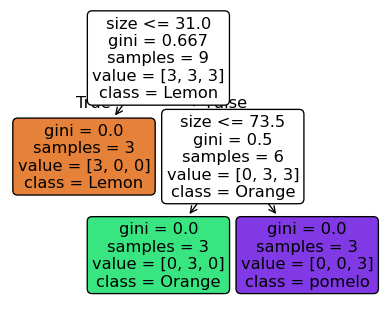

In [255]:
from sklearn.tree import plot_tree

data_feature_names = ['size']

plt.subplots(nrows=1, figsize=(5, 4), dpi=96)

plot_tree(model,
            filled=True, rounded=True,
            feature_names=data_feature_names,
            class_names=fruit_classes)

plt.show()

In [256]:
X_input_size = 72.4
if (X_input_size <= 31):
    fruit = 'Lemon'
elif (X_input_size <= 73.5):
    fruit = 'Orange'
else:
    fruit = 'Pomelo'

print(fruit)

Orange


### Decision regions

In [257]:
from mlxtend.plotting import plot_decision_regions

In [258]:
X = [[27],
    [35],
    [39],
    [21],
    [22],
    [45],
    [102],
    [110],
    [120]]

y_names = ['lemon', 'orange', 'orange', 'lemon', 'lemon', 'orange','pomelo', 'pomelo', 'pomelo']
y = [0, 1, 1, 0, 0, 1, 2, 2, 2]

In [259]:
X = np.array(X)
y = np.array(y)

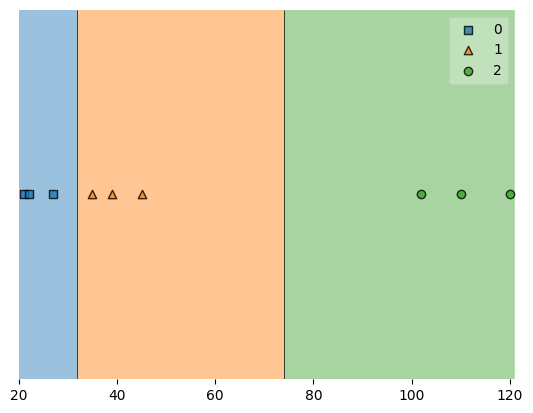

In [260]:
plot_decision_regions(X, y, clf=model)
plt.show()

### Classification 2 classes (2 Features - Fruit 2 classes)